<a href="https://colab.research.google.com/github/potgieterphiline/UdemyTrainingCode/blob/main/PolynomialReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/sample_data/Advertising.csv")

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = df.drop('sales',axis=1)
y = df['sales']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [ ]:
poly_feat = polynomial_converter.transform(X)

In [ ]:
poly_feat[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,test_pred)

In [ ]:
MSE = mean_squared_error(y_test,test_pred)

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
MAE

0.4896798044803838

In [ ]:
MSE

0.4417505510403753

In [ ]:
RMSE

np.float64(0.6646431757269274)

In [ ]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [ ]:
poly_feat[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [ ]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
  poly_converter = PolynomialFeatures(degree=d,include_bias=False)
  poly_features = poly_converter.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

  model = LinearRegression()
  model.fit(X_train,y_train)

  train_pred = model.predict(X_train)
  test_pred =  model.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))

  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)




In [ ]:
train_rmse_errors

[np.float64(1.734594124329376),
 np.float64(0.5879574085292232),
 np.float64(0.43393443569020673),
 np.float64(0.35170836883993495),
 np.float64(0.2509342964085938),
 np.float64(0.20953728551101827),
 np.float64(0.22046859153994317),
 np.float64(0.2714979027161063),
 np.float64(0.5132042855936876)]

In [ ]:
test_rmse_errors

[np.float64(1.5161519375993877),
 np.float64(0.6646431757269274),
 np.float64(0.5803286825236476),
 np.float64(0.5077742639859423),
 np.float64(2.5758223594965197),
 np.float64(9.871409346164954),
 np.float64(41.33056641548232),
 np.float64(3103.1690816102614),
 np.float64(12768.354850329542)]

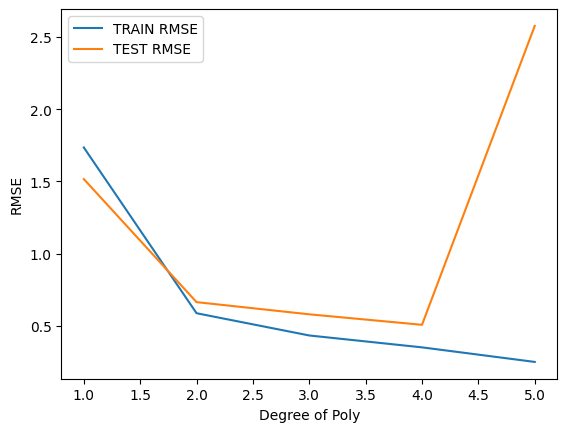

In [ ]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

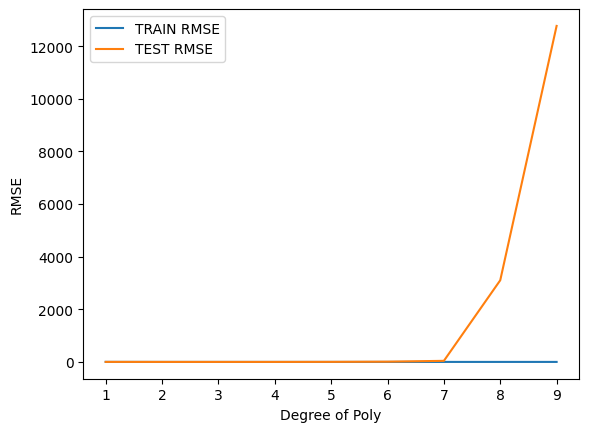

In [ ]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN RMSE')
plt.plot(range(1,10),test_rmse_errors,label='TEST RMSE')
plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [ ]:
final_model = LinearRegression()

In [ ]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [ ]:
from joblib import dump,load

In [ ]:
dump(final_model,'finalpoly.joblib')

['finalpoly.joblib']

In [ ]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [ ]:
loaded_converter = load('final_converter.joblib')

In [ ]:
loaded_model = load('finalpoly.joblib')

In [ ]:
campaign = [[149,22,12]]

In [ ]:
trans_data = loaded_converter.fit_transform(campaign)

In [ ]:
loaded_model.predict(trans_data)

array([14.64501014])